In [128]:
import pandas as pd 
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [129]:
df = pd.read_csv("bank_churn.csv")
df.head()

,ID,active_member,age,balance,credit_card,credit_score,tenure,churn
0,0,1,62,127738.750000,1,547,10,0
1,1,0,46,66582.810000,1,749,9,1
2,2,1,34,0.000000,1,695,9,0
3,3,1,42,0.000000,0,643,4,1
4,4,0,45,176679.109513,0,661,4,1


In [130]:
df.shape

(600, 8)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             600 non-null    int64  
 1   active_member  600 non-null    int64  
 2   age            600 non-null    int64  
 3   balance        600 non-null    float64
 4   credit_card    600 non-null    int64  
 5   credit_score   600 non-null    int64  
 6   tenure         600 non-null    int64  
 7   churn          600 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 37.6 KB


In [132]:
df.describe()

,ID,active_member,age,balance,credit_card,credit_score,tenure,churn
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,299.500000,0.386667,41.448333,84874.486341,0.603333,649.231667,4.855000,0.500000
std,173.349358,0.487393,10.908513,62900.293847,0.489614,88.941248,2.816119,0.500417
min,0.000000,0.000000,20.000000,0.000000,0.000000,350.000000,0.000000,0.000000
25%,149.750000,0.000000,33.000000,0.000000,0.000000,591.750000,3.000000,0.000000
50%,299.500000,0.000000,41.000000,107688.905000,1.000000,648.000000,5.000000,0.500000
75%,449.250000,1.000000,49.000000,134839.800930,1.000000,707.000000,7.000000,1.000000
max,599.000000,1.000000,78.000000,206868.780000,1.000000,850.000000,10.000000,1.000000


In [133]:
df.value_counts("churn")

churn
0    300
1    300
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x29b3b024190>,
 'caps': [<matplotlib.lines.Line2D at 0x29b3b024410>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b3b024050>],
 'medians': [<matplotlib.lines.Line2D at 0x29b3b024690>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b3b0247d0>],
 'means': []}

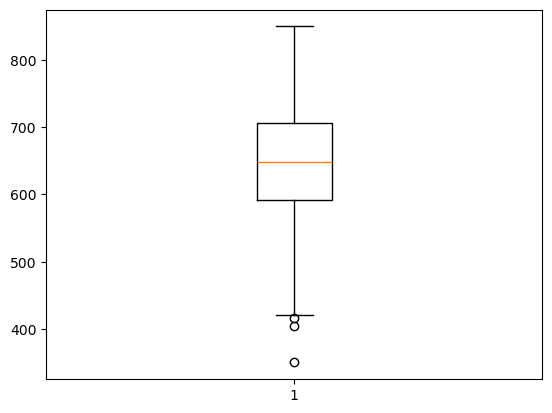

In [134]:
plt.boxplot(df["credit_score"])

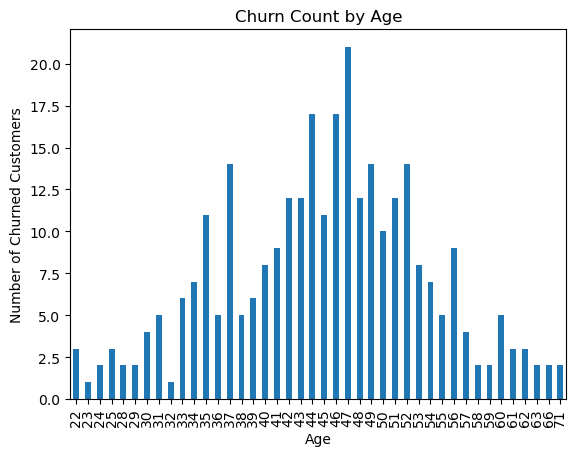

In [152]:
age_churn = df[df["churn"] == 1].groupby("age")["churn"].count()


age_churn.plot(kind="bar")

plt.xlabel("Age")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Count by Age")
plt.show()

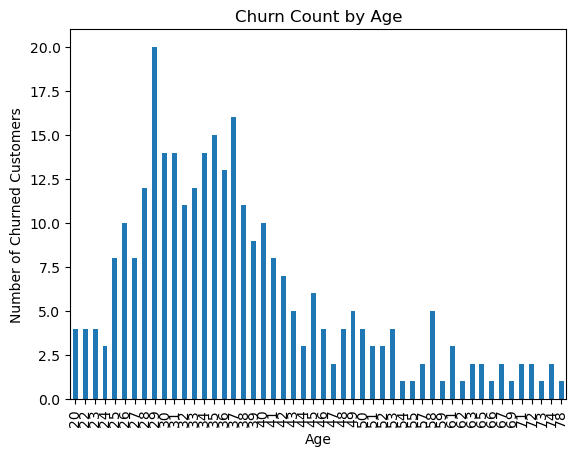

In [153]:
age_churn = df[df["churn"] == 0].groupby("age")["churn"].count()


age_churn.plot(kind="bar")

plt.xlabel("Age")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Count by Age")
plt.show()

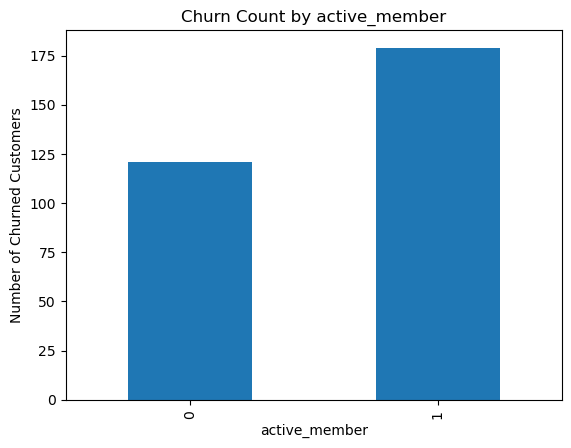

In [205]:
age_churn = df[df["churn"] == 1].groupby("active_member")["churn"].count()


active_member_churn.plot(kind="bar")

plt.xlabel("active_member")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Count by active_member")
plt.show()

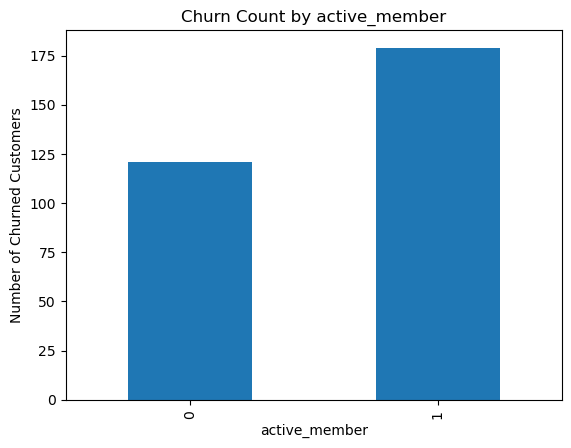

In [204]:
active_member_churn = df[df["churn"] == 0].groupby("active_member")["churn"].count()


active_member_churn.plot(kind="bar")

plt.xlabel("active_member")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Count by active_member")
plt.show()

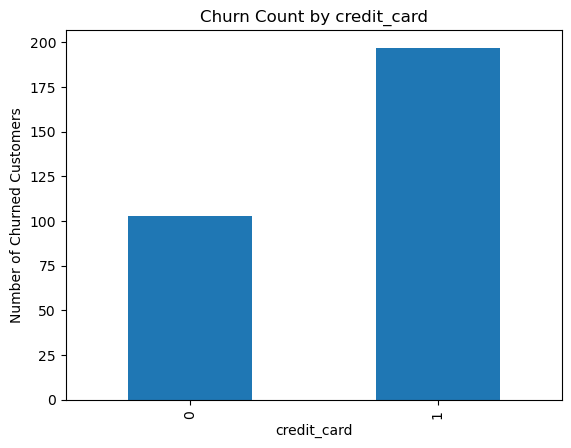

In [203]:
credit_card_churn = df[df["churn"] == 0].groupby("credit_card")["churn"].count()


credit_card_churn.plot(kind="bar")

plt.xlabel("credit_card")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Count by credit_card")
plt.show()

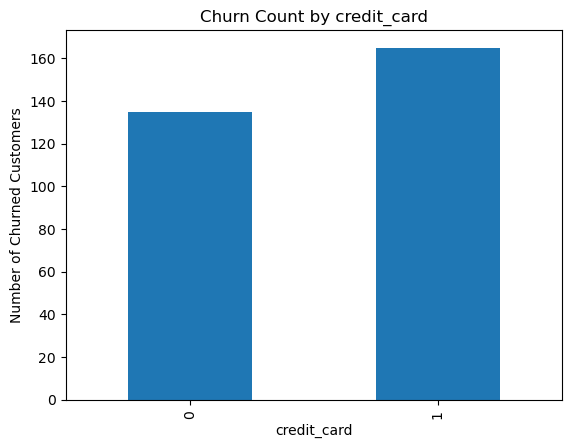

In [201]:
credit_card_churn = df[df["churn"] == 1].groupby("credit_card")["churn"].count()


credit_card_churn.plot(kind="bar")

plt.xlabel("credit_card")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Count by credit_card")
plt.show()

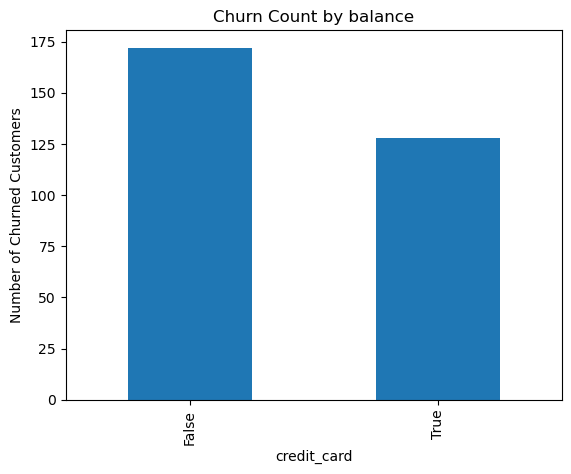

In [202]:
a = df["balance"]<107688.905000	

balance_churn = df[df["churn"] == 1].groupby(a)["churn"].count()


balance_churn.plot(kind="bar")

plt.xlabel("credit_card")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Count by balance")
plt.show()

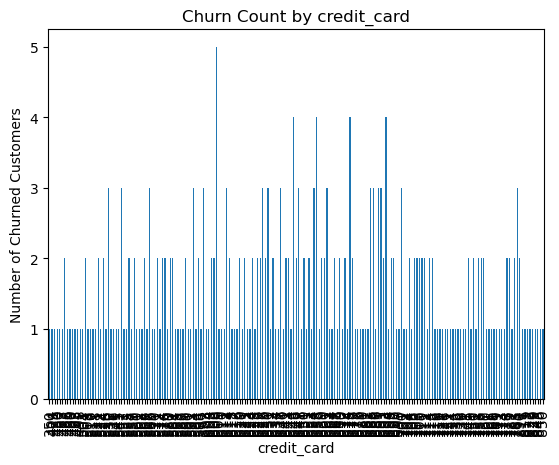

In [200]:
credit_card_churn = df[df["churn"] == 1].groupby("credit_score")["churn"].count()


credit_card_churn.plot(kind="bar")

plt.xlabel("credit_card")
plt.ylabel("Number of Churned Customers")
plt.title("Churn Count by credit_card")
plt.show()

In [135]:
upl = df["credit_score"].mean() + 3*df["credit_score"].std()
lwl = df["credit_score"].mean() - 3*df["credit_score"].std()
print(upl)
print(lwl)

916.055410285179
382.40792304815426


In [136]:
df[(df.credit_score)<lwl]

,ID,active_member,age,balance,credit_card,credit_score,tenure,churn
253,253,1,51,0.0,1,350,10,1


In [137]:
df['tenure'].unique()

array([10,  9,  4,  7,  6,  0,  1,  8,  3,  5,  2])

In [175]:
X = df.drop(columns=["churn" , "ID" , "balance" ,"credit_score"])
y = df["churn"]

In [176]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2, random_state=42)

In [172]:
X_train.head()

,active_member,age,credit_card,credit_score,tenure
145,0,24,0,696,9
9,0,30,1,627,6
375,0,37,1,785,4
523,0,56,1,593,6
188,0,52,1,501,3


In [177]:
scaler = StandardScaler()

In [178]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
model = LogisticRegression()

In [180]:
model.fit(X_train , y_train)

LogisticRegression()

In [181]:
acc_train = accuracy_score(y_train , model.predict(X_train))
acc_train

0.7375

In [182]:
acc_test = model.score(X_test,y_test)

In [183]:
acc_test

0.7833333333333333

In [184]:
y_pred = model.predict(X_test)

In [186]:
results = pd.DataFrame({
    "Actual_Price": y_test.values,
    "Predicted_Price": y_pred
})
results.head(10)

,Actual_Price,Predicted_Price
0,1,1
1,0,0
2,1,1
3,0,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,0,0


In [206]:
results.to_csv("Churn predictions_vs_actual.csv", index=False)


In [207]:
# -----------------------------
# 1. Predictions
# -----------------------------
y_pred = model.predict(X_test)

# For ROC-AUC you need probabilities of class 1 (churn)
y_prob = model.predict_proba(X_test)[:, 1]


# -----------------------------
# 2. Confusion Matrix
# -----------------------------
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)   # [[TN  FP]  [FN  TP]]


# -----------------------------
# 3. Classification Report
# (Precision, Recall, F1-score)
# -----------------------------
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# -----------------------------
# 4. ROC–AUC Score
# -----------------------------
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_prob)
print("ROC–AUC Score:", auc)


# -----------------------------


Confusion Matrix:
[[38 17]
 [ 9 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        55
           1       0.77      0.86      0.81        65

    accuracy                           0.78       120
   macro avg       0.79      0.78      0.78       120
weighted avg       0.79      0.78      0.78       120

ROC–AUC Score: 0.8569230769230769


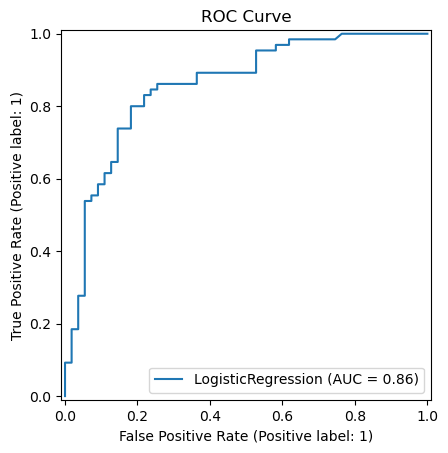

In [208]:
# 5. ROC Curve Plot
# -----------------------------
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()
